In [1]:
pip install pymysql pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import pymysql
import warnings
warnings.filterwarnings("ignore")

In [3]:
connection = pymysql.connect(
    host='18.136.157.135',
    user='dm_team',
    password='DM!$Team@&27920!',
    database='project_itsm',
)


In [4]:
tables_df = pd.read_sql("SHOW TABLES;", connection)
print("Tables in the database:")
print(tables_df)

Tables in the database:
  Tables_in_project_itsm
0           dataset_list


In [5]:
query="SELECT*FROM dataset_list;"
df= pd.read_sql(query, connection)

In [6]:
connection.close()

In [7]:
df.head()

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


# ***EDA***

In [9]:
df.replace(['NA','NS'],np.nan,inplace=True) # there were na nad ns values in the dataset so we replaced them

In [10]:
cols_to_numeric=['Impact','Urgency','Priority','number_cnt'	,'Handle_Time_hrs','No_of_Reassignments', 'No_of_Related_Interactions', 'No_of_Related_Incidents','No_of_Related_Changes']	
for col in cols_to_numeric:
    df[col] = pd.to_numeric(df[col],errors='coerce')


In [11]:
date_cols = ['Reopen_Time', 'Resolved_Time', 'Close_Time', 'Open_Time']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)

In [12]:
missing_summary = df.isnull().sum().sort_values(ascending=False)
print("Missing Values Summary:")
print(missing_summary.head(10))

Missing Values Summary:
Handle_Time_hrs               46350
No_of_Related_Changes         46046
No_of_Related_Incidents       45384
Reopen_Time                   44322
Resolved_Time                  1780
Impact                         1380
Priority                       1380
No_of_Related_Interactions      114
Urgency                           1
No_of_Reassignments               1
dtype: int64


In [13]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Name                     46606 non-null  object        
 1   CI_Cat                      46606 non-null  object        
 2   CI_Subcat                   46606 non-null  object        
 3   WBS                         46606 non-null  object        
 4   Incident_ID                 46606 non-null  object        
 5   Status                      46606 non-null  object        
 6   Impact                      45226 non-null  float64       
 7   Urgency                     46605 non-null  float64       
 8   Priority                    45226 non-null  float64       
 9   number_cnt                  46606 non-null  float64       
 10  Category                    46606 non-null  object        
 11  KB_number                   46606 non-null  object    

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4.0,4.0,4.0,0.601292,...,NaT,2013-11-04 13:50:00,2013-11-04 13:51:00,NaN,Other,1.0,SD0000007,2.0,NaN,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3.0,3.0,3.0,0.415050,...,2013-12-02 12:31:00,2013-12-02 12:36:00,2013-12-02 12:36:00,NaN,Software,1.0,SD0000011,1.0,NaN,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NaN,3.0,NaN,0.517551,...,NaT,2014-01-13 15:12:00,2014-01-13 15:13:00,NaN,No error - works as designed,1.0,SD0000017,NaN,NaN,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4.0,4.0,4.0,0.642927,...,NaT,2013-11-14 09:31:00,2013-11-14 09:31:00,NaN,Operator error,1.0,SD0000025,NaN,NaN,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4.0,4.0,4.0,0.345258,...,NaT,2013-11-08 13:55:00,2013-11-08 13:55:00,NaN,Other,1.0,SD0000029,NaN,NaN,


In [14]:
df.drop(columns=['Handle_Time_hrs'],inplace=True)

In [15]:
df['Urgency'].fillna(df['Urgency'].mode()[0], inplace=True)
df['Impact'].fillna(df['Impact'].mode()[0], inplace=True)
df['Priority'].fillna(df['Priority'].mode()[0], inplace=True)

In [16]:
df['Resolution_Time_Hours']=(df['Resolved_Time']-df['Open_Time']).dt.total_seconds() /3600 

In [17]:
df['High_Priority']=df['Priority'].apply(lambda x: 1 if x in [1,2] else 0)

In [18]:
features= ['Impact', 'Urgency', 'No_of_Reassignments', 'No_of_Related_Interactions', 'No_of_Related_Incidents', 'Resolution_Time_Hours']
X=df[features]
y=df['High_Priority']

In [19]:
print(X.dtypes)

Impact                        float64
Urgency                       float64
No_of_Reassignments           float64
No_of_Related_Interactions    float64
No_of_Related_Incidents       float64
Resolution_Time_Hours         float64
dtype: object


# **OBJECTIVE 1**

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=X.fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.2, random_state=42)

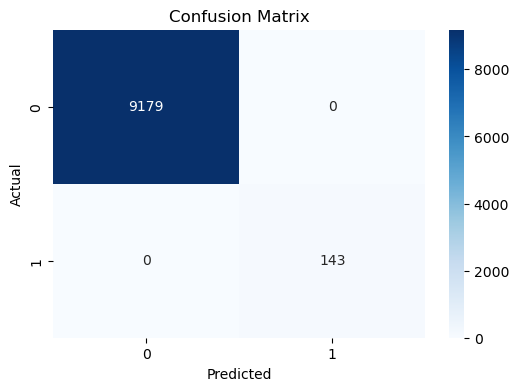

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9179
           1       1.00      1.00      1.00       143

    accuracy                           1.00      9322
   macro avg       1.00      1.00      1.00      9322
weighted avg       1.00      1.00      1.00      9322



In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

In [23]:
feature_names = X.columns
importances = model.feature_importances_
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=False)

,Feature,Importance
0,Impact,0.503797
1,Urgency,0.472570
5,Resolution_Time_Hours,0.016574
4,No_of_Related_Incidents,0.003518
3,No_of_Related_Interactions,0.002430
2,No_of_Reassignments,0.001111


# **OBJECTIVE 2** (FORECASTING)

In [25]:
df['Open_Time'] = pd.to_datetime(df['Open_Time'] , errors='coerce')

monthly_counts = df.groupby(df['Open_Time'].dt.to_period('M')).size().reset_index(name='y')
monthly_counts['Open_Time']=monthly_counts['Open_Time'].dt.to_timestamp()
monthly_counts.columns =['ds','y']
monthly_counts.head()

,ds,y
0,2012-02-01,1
1,2012-03-01,2
2,2012-07-01,1
3,2012-08-01,5
4,2012-09-01,2


In [26]:
monthly_counts[monthly_counts['ds'] >= '2013-07-01']

,ds,y
14,2013-07-01,73
15,2013-08-01,93
16,2013-09-01,857
17,2013-10-01,8606
18,2013-11-01,8128
19,2013-12-01,6743
20,2014-01-01,8270
21,2014-02-01,7377
22,2014-03-01,6332


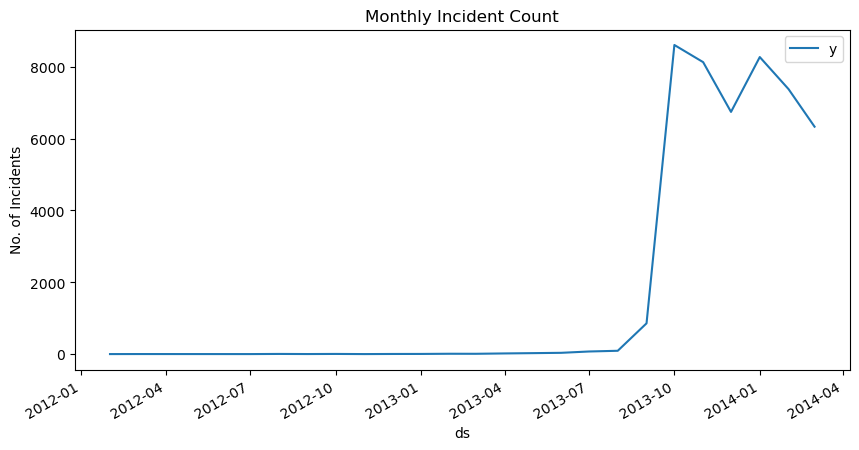

In [27]:
import matplotlib.pyplot as plt

monthly_counts.plot(x='ds', y='y', kind='line', title="Monthly Incident Count", figsize=(10, 5))
plt.ylabel("No. of Incidents")
plt.show()

In [28]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [29]:
from prophet import Prophet

model=Prophet()
model.fit(monthly_counts)

20:57:15 - cmdstanpy - INFO - Chain [1] start processing
20:57:16 - cmdstanpy - INFO - Chain [1] done processing


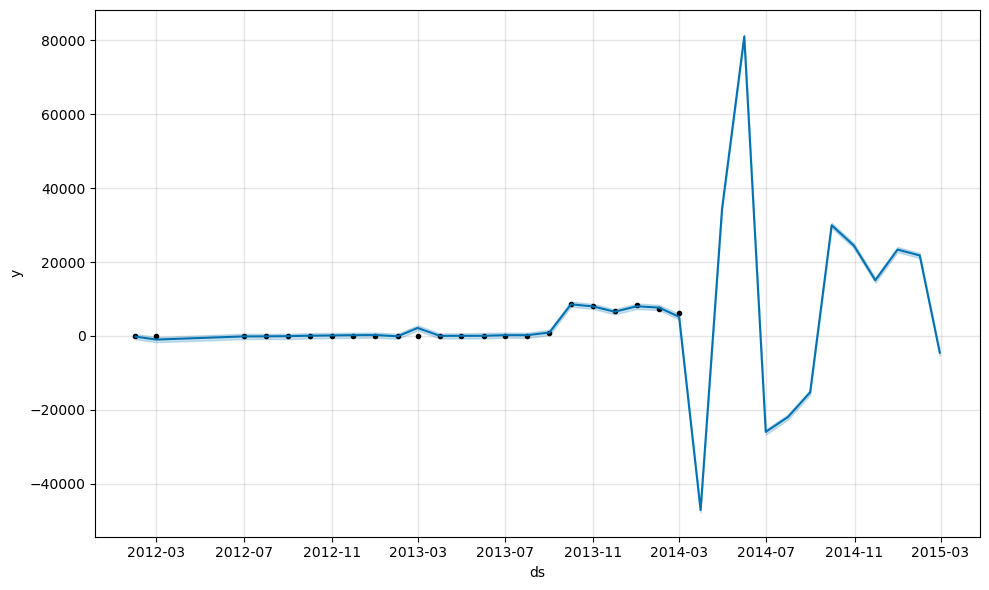

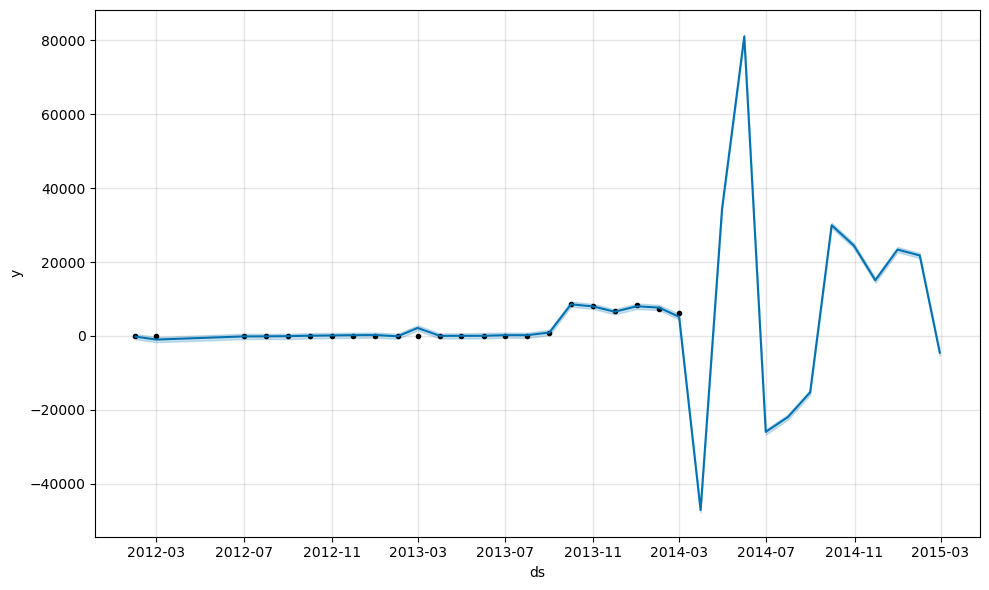

In [30]:
future= model.make_future_dataframe(periods=12,freq='M')
forecast= model.predict(future)
model.plot(forecast)

# **OBJECTIVE 3**(AUTO TAG)

In [32]:
df = df[df['Priority'].notnull()]

y = df['Priority']

X = df[['Impact', 'Urgency', 'No_of_Reassignments', 'No_of_Related_Interactions',
        'No_of_Related_Incidents', 'Resolution_Time_Hours']]

X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(0)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
    
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

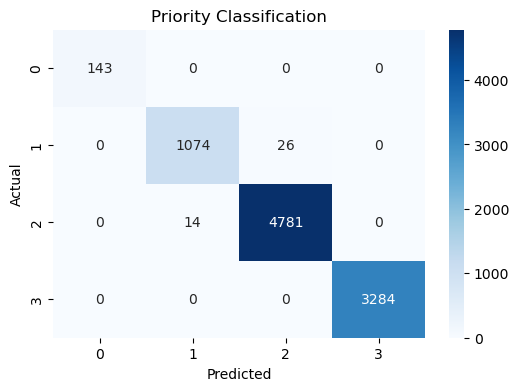

              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00       143
         3.0       0.99      0.98      0.98      1100
         4.0       0.99      1.00      1.00      4795
         5.0       1.00      1.00      1.00      3284

    accuracy                           1.00      9322
   macro avg       1.00      0.99      0.99      9322
weighted avg       1.00      1.00      1.00      9322



In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Priority Classification")
plt.show()

print(classification_report(y_test, y_pred))


In [35]:
df=df[df['CI_Cat'].notnull()]

y=df['CI_Cat']

X = df[['Impact', 'Urgency', 'Priority', 'No_of_Reassignments', 
        'No_of_Related_Interactions', 'No_of_Related_Incidents', 'Resolution_Time_Hours']]

X=X.apply(pd.to_numeric, errors='coerce').fillna(0)

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

le=LabelEncoder()
y_encoded =le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

Classification Report:
                      precision    recall  f1-score   support

                           0.00      0.00      0.00        26
               Phone       0.00      0.00      0.00         1
         application       0.71      0.84      0.77      6541
applicationcomponent       0.00      0.00      0.00         3
            computer       0.29      0.22      0.25       741
            database       0.06      0.02      0.03        48
       displaydevice       0.17      0.15      0.16        40
            hardware       0.14      0.11      0.12        82
   networkcomponents       0.00      0.00      0.00        24
   officeelectronics       0.00      0.00      0.00        28
            software       0.00      0.00      0.00        68
             storage       0.12      0.09      0.10       147
      subapplication       0.22      0.11      0.15      1573

            accuracy                           0.63      9322
           macro avg       0.13      0.12    

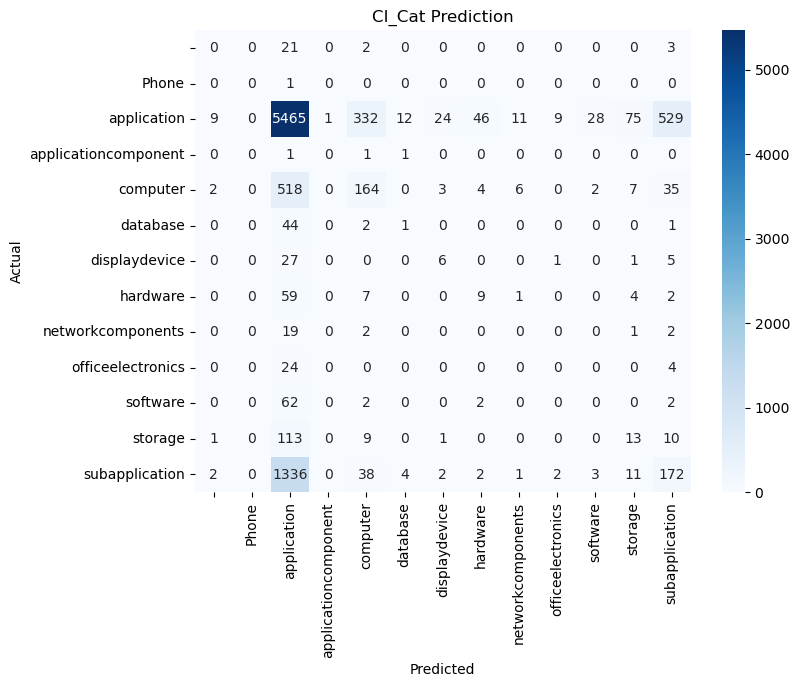

In [37]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_pred_labels = le.inverse_transform(y_pred)
y_test_labels = le.inverse_transform(y_test)

print("Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_labels, y_pred_labels, labels=le.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CI_Cat Prediction")
plt.show()

In [38]:
df['RFC_Required'] = df['No_of_Related_Changes'].apply(lambda x: 1 if x > 0 else 0)

X = df[['Impact', 'Urgency', 'Priority', 'No_of_Reassignments',
        'No_of_Related_Interactions', 'No_of_Related_Incidents', 'Resolution_Time_Hours']]
y = df['RFC_Required']

X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9222
           1       0.03      0.01      0.01       100

    accuracy                           0.99      9322
   macro avg       0.51      0.50      0.50      9322
weighted avg       0.98      0.99      0.98      9322



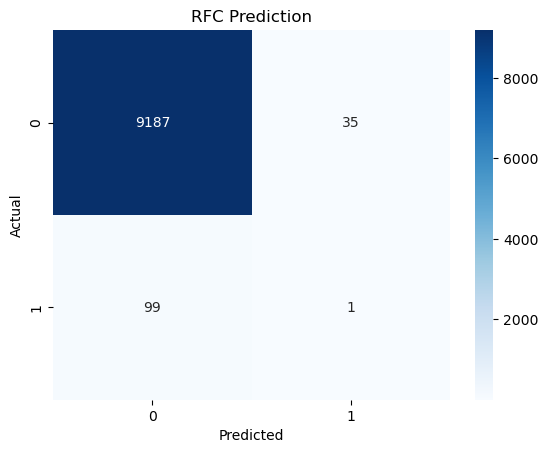

In [78]:
lf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("RFC Prediction")
plt.show()